In [1]:
import numpy as np
import matplotlib.pyplot as plt


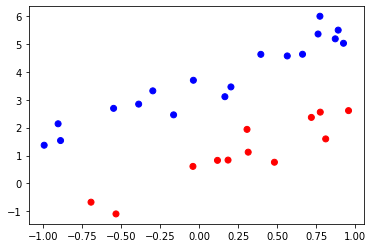

In [117]:
w_gen = np.array([[2.0, 0.5], [2.0, 3.5]])

# generate labels
n_data = 30
t_n = np.random.choice([-1, 1], p=[0.5, 0.5], size=n_data)
c_n = (t_n == 1).astype(int) # binary class index

# generate data
x = np.random.uniform(-1, 1, size=n_data)
y = x * w_gen[c_n, 0] + w_gen[c_n, 1] + .45 * np.random.randn(n_data)

X = np.stack([x, y], axis=1)

def plot_data(X, c_n, ax):
    colors = [ 'red' if c==0 else 'blue' for c in c_n ]
    ax.scatter(X[:,0], X[:,1], c=colors)

fig, ax = plt.subplots()
plot_data(X, c_n, ax)
plt.show()

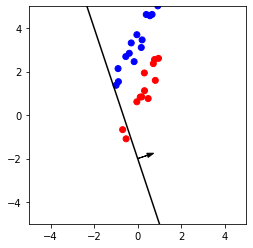

In [134]:
def plot_decision_boundary(w, ax, arrow_scale: float = 1):
    if len(w) != 3:
        raise ValueError('w must be a 3-vector')

    def x_to_y(x):
        return -(w[0] + w[1] * x) / w[2]

    # get points on hyperplane
    xx = np.linspace(-20, 20)
    yy = x_to_y(xx)

    # get arrow base coords on hyperplane
    x_arr = 0
    y_arr = x_to_y(x_arr)

    # scale the normal vector
    w_scaled = arrow_scale * w[1:] / w[1:].sum()

    ax.plot(xx, yy, color='black')
    ax.arrow(x_arr, y_arr, w_scaled[0], w_scaled[1], head_width=arrow_scale/3, color='black')


w = np.array([2.0, 3.0, 1.0])
fig, ax = plt.subplots()
ax.set(xlim=[-5,5], ylim=[-5,5], aspect='equal')
plot_decision_boundary(w, ax, arrow_scale=0.6)
plot_data(X, c_n, ax)
plt.show()

In [213]:
def phi(X):
    return np.concatenate([np.ones((X.shape[0],1)), X], axis=1)

def activation(z):
    return 2 * (z >= 0).astype(int) - 1

def perceptron_error(X, t, w):
    # forward prediction
    t_pred = activation(phi(X) @ w)
    misclass_idx = np.argwhere(t != t_pred).flatten()
    err = 0.0
    for midx in misclass_idx:
        err -= w @ [1, X[midx,0], X[midx,1]] * t[midx]
    return err

def sgd_step(X, t, w):
    for n in range(X.shape[0]): # one epoch
        w += np.array([1, X[n,0], X[n,1]]) * t[n]
    return w / w.sum()

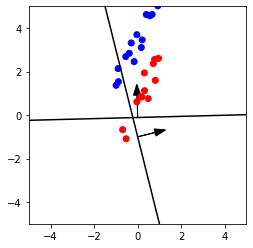

In [214]:
w_init = np.array([1.0, 4.0, 1.0])
w_step = w_init.copy()

n_epochs = 100
losses = np.zeros(n_epochs)
for n_e in range(n_epochs):
    w_step = sgd_step(X, t_n, w_step)
    losses[n_e] = perceptron_error(X, t_n, w_step)

fig, ax = plt.subplots()
ax.set(xlim=[-5,5], ylim=[-5,5], aspect='equal')
plot_decision_boundary(w_init, ax, arrow_scale=1)
plot_decision_boundary(w_step, ax, arrow_scale=1)
plot_data(X, c_n, ax)
plt.show()

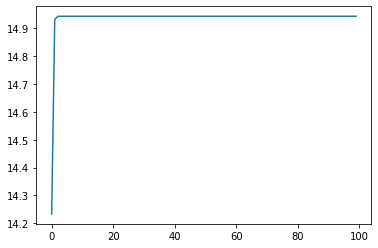

In [215]:
plt.plot(losses)